In [2]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/siddhant-dutta/MOODIFY-learning/main/Assignment_3/problem2/train.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/siddhant-dutta/MOODIFY-learning/main/Assignment_3/problem2/test.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
x_train, y_train = data.iloc[:,1:].values.astype('float32'), data.iloc[:,0].values.astype('int32')
x_train = x_train.reshape(x_train.shape[0], 28, 28 ,1)
x_train.shape
x_test = data2.iloc[:,0:].values.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test.shape

(28000, 28, 28, 1)

In [10]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [11]:
x_train /= 255
x_train[1].shape

(28, 28, 1)

<Figure size 1080x144 with 0 Axes>

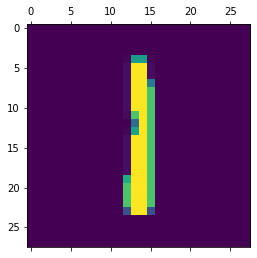

In [84]:
plt.figure(figsize = (15,2))
plt.matshow(x_train.reshape(x_train.shape[0],28,28)[2])

In [95]:
model = keras.Sequential([
        keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2,2)),
 
        keras.layers.Flatten(),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])
model.compile(optimizer ="Adam", loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [105]:
model.fit(x_train, y_train, epochs =5)

Epoch 1/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0316 - accuracy: 0.9895
Epoch 2/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0274 - accuracy: 0.9920
Epoch 3/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 4/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0214 - accuracy: 0.9938
Epoch 5/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0217 - accuracy: 0.9936


In [106]:
model.predict(x_train)

array([[9.66654122e-02, 1.00000000e+00, 9.71241971e-05, ...,
        1.22985244e-03, 2.83482671e-03, 4.06262757e-09],
       [1.00000000e+00, 5.68839132e-05, 3.18488777e-02, ...,
        4.30210233e-02, 9.99506295e-01, 9.85514402e-01],
       [4.01735306e-04, 1.00000000e+00, 9.12493110e-01, ...,
        9.99996066e-01, 1.00000000e+00, 9.99997497e-01],
       ...,
       [1.35958195e-04, 2.46837735e-03, 1.24634445e-01, ...,
        1.00000000e+00, 1.44442916e-03, 4.61636305e-01],
       [2.20881283e-01, 6.52479648e-05, 4.29705438e-11, ...,
        1.37627103e-06, 1.37299299e-04, 1.72439218e-03],
       [3.00794840e-04, 9.41750926e-08, 7.36788213e-02, ...,
        3.26015413e-01, 8.10668425e-05, 9.99974966e-01]], dtype=float32)

In [113]:
def Prediction(x):
  y_pred = model.predict(x)
  y_pred_num = [np.argmax(i) for i in y_pred]
  return y_pred_num
y_pred_labels = Prediction(x_test)

In [108]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
print("Classification Report: \n", classification_report(y_train, Prediction(x_train)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4132
           1       0.92      1.00      0.96      4684
           2       0.81      0.93      0.86      4177
           3       0.63      0.97      0.76      4351
           4       0.90      0.99      0.94      4072
           5       0.74      0.39      0.51      3795
           6       1.00      0.91      0.95      4137
           7       0.99      0.93      0.96      4401
           8       0.99      0.70      0.82      4063
           9       1.00      0.93      0.96      4188

    accuracy                           0.88     42000
   macro avg       0.90      0.88      0.87     42000
weighted avg       0.90      0.88      0.88     42000



Text(69.0, 0.5, 'Truth')

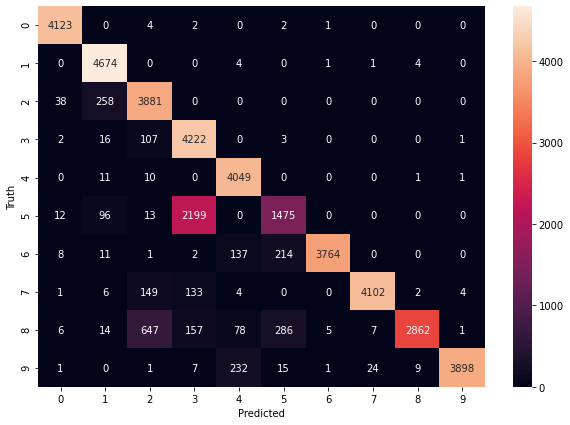

In [109]:
cm = tf.math.confusion_matrix(labels=y_train,predictions= Prediction(x_train))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [114]:
index = [i for i in data2.index]
y_pred_labels_d = pd.DataFrame(index)
y_pred_labels_d.columns = ['ImageID']
y_pred_labels = [i for i in y_pred_labels]
y_pred_labels_d['Label'] = y_pred_labels

y_pred_labels_d.to_csv('/content/drive/MyDrive/MOODIFY /Introduction to machine learning/Assignment_3/Problem_2/newProblem2.csv', index = False)